In [72]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import yaml
import common

FONT_SIZE = 15

plt.rc('font', size=FONT_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=FONT_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=FONT_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=FONT_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=FONT_SIZE)    # legend fontsize
plt.rc('figure', titlesize=FONT_SIZE)  # fontsize of the figure title
matplotlib.rc('lines', linewidth=3)

In [345]:
fields = ['type', 'i1', 'i2', 'i3', 'i4', 'i0']
threshold = 10000000

In [340]:
df_global = pd.read_csv(f'{common.WEBCACHESIM_ROOT}/snapshot.log', delimiter=' ', names=fields)

In [341]:
df_global.head()

,type,i1,i2,i3,i4,i0
0,1,723,730,806,870,475
1,1,494,539,616,624,88
2,1,7430,1707548,1742526,3463012,8025228
3,1,166227,2615300,3117736,5261126,668040
4,1,1150658,5309785,8540268,9023535,91130


In [342]:
df_snapshot = df_global[df_global.type==2]

In [343]:
df_snapshot = df_global[df_global.type==2].copy()

In [346]:
df_snapshot.head()

,type,i1,i2,i3,i4,i0
2039914,2,22,63,1246,1414,294
2039915,2,153,346,416,636,139
2039916,2,7755310,8355482,8752174,10000000,5313077
2039917,2,212455,999359,4912332,7808394,2126387
2039918,2,30749,1685599,3003372,6076566,102242


In [370]:
max(df_snapshot.i2 - df_snapshot.i1, 1)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [383]:
df_snapshot['d2'] = threshold * (df_snapshot.i2 == threshold) + \
                    ((df_snapshot.i2 != threshold) & (df_snapshot.i2 - df_snapshot.i1 != threshold)) * (df_snapshot.i2 - df_snapshot.i1) + \
                    ((df_snapshot.i2 != threshold) & (df_snapshot.i2 - df_snapshot.i1 == threshold)) * (threshold - 1)
df_snapshot['d3'] = threshold * (df_snapshot.i3 == threshold) + \
                    ((df_snapshot.i3 != threshold) & (df_snapshot.i3 - df_snapshot.i2 != threshold)) * (df_snapshot.i3 - df_snapshot.i2) + \
                    ((df_snapshot.i3 != threshold) & (df_snapshot.i3 - df_snapshot.i2 == threshold)) * (threshold - 1)
df_snapshot['d4'] = threshold * (df_snapshot.i4 == threshold) + \
                    ((df_snapshot.i4 != threshold) & (df_snapshot.i4 - df_snapshot.i3 != threshold)) * (df_snapshot.i4 - df_snapshot.i3) + \
                    ((df_snapshot.i4 != threshold) & (df_snapshot.i4 - df_snapshot.i3 == threshold)) * (threshold - 1)

In [386]:
df_snapshot

,type,i1,i2,i3,i4,i0,d2,d3,d4,ci1,cd2,cd3,cd4
2039914,2,22,63,1246,1414,294,41,1183,168,0,0,0,0
2039915,2,153,346,416,636,139,193,70,220,0,0,0,0
2039916,2,7755310,8355482,8752174,10000000,5313077,600172,396692,10000000,7,0,0,10
2039917,2,212455,999359,4912332,7808394,2126387,786904,3912973,2896062,0,0,3,2
2039918,2,30749,1685599,3003372,6076566,102242,1654850,1317773,3073194,0,1,1,3
2039919,2,1563775,2143076,2381295,4516618,2085212,579301,238219,2135323,1,0,0,2
2039920,2,345322,353029,465239,478489,203624,7707,112210,13250,0,0,0,0
2039921,2,25958,47176,117823,166543,70495,21218,70647,48720,0,0,0,0
2039922,2,567020,570354,573587,1018199,1599783,3334,3233,444612,0,0,0,0
2039923,2,256767,367101,461164,897169,626818,110334,94063,436005,0,0,0,0


In [463]:
for i in ['i1', 'd2', 'd3', 'd4', 'i0']:
    df_snapshot.loc[:, f'c{i}'] = df_snapshot[i]//1000000

In [481]:
df = df_snapshot.groupby(['cd4', 'cd3', 'cd2', 'ci1', 'ci0']).aggregate({'type': 'count'})

In [482]:
df

type
cd4 cd3 cd2 ci1 ci0       
0   0   0   0   0    49856
                1     6232
                2     1889
                3      889
                4      367
                5      206
                6      118
                7       62
                8       50
                9       40
                10     127
            1   0     6395
                1     2286
                2      935
                3      526
                4      302
                5      157
                6      103
                7       52
                8       25
                9       26
                10     129
            2   0     1910
                1      822
                2      416
                3      232
                4      134
                5       70
                6       60
                7       35
...                    ...
10  10  10  7   3     3901
                4     3518
                5     3202
                6     2767
                7     2440
                8     2287
                9     2015
                10   87293
            8   0     5565
                1     4798
                2     4285
                3     3999
                4     3568
                5     3307
                6     2850
                7     2426
                8     2350
                9     2209
                10   87172
            9   0     5386
                1     4720
                2     4276
                3     3991
                4     3561
                5     3314
                6     2711
                7     2571
                8     2320
                9     2133
                10   87959

[9573 rows x 1 columns]

In [488]:
df1 = df.reset_index().pivot_table(columns='ci0', index=['cd4', 'cd3', 'cd2', 'ci1'], values='type')

In [491]:
df1[df1.isna()] = 0

In [493]:
df1

ci0                   0       1       2       3       4       5       6   \
cd4 cd3 cd2 ci1                                                            
0   0   0   0    49857.0  6233.0  1890.0   890.0   368.0   207.0   119.0   
            1     6396.0  2287.0   936.0   527.0   303.0   158.0   104.0   
            2     1911.0   823.0   417.0   233.0   135.0    71.0    61.0   
            3      833.0   389.0   240.0   127.0    82.0    61.0    46.0   
            4      397.0   201.0   115.0    82.0    41.0    28.0    24.0   
            5      196.0   112.0    78.0    58.0    39.0    23.0    27.0   
            6      131.0    73.0    45.0    29.0    19.0    19.0    11.0   
            7       76.0    52.0    40.0    23.0    16.0    15.0    12.0   
            8       27.0    22.0    17.0    10.0    12.0     9.0     7.0   
            9        3.0     0.0     0.0     3.0     3.0     0.0     0.0   
        1   0     6304.0  2047.0   834.0   460.0   246.0   144.0    80.0   
            1     1859.0   815.0   378.0   240.0   135.0    76.0    59.0   
            2      782.0   370.0   195.0   130.0    82.0    50.0    33.0   
            3      360.0   199.0   111.0    99.0    47.0    45.0    28.0   
            4      192.0   130.0    78.0    43.0    39.0    16.0    16.0   
            5      109.0    81.0    45.0    37.0    21.0    14.0    16.0   
            6       74.0    40.0    39.0    21.0    13.0     8.0    13.0   
            7       31.0    22.0    10.0    13.0     6.0     9.0     2.0   
            8        7.0     3.0     2.0     0.0     0.0     2.0     0.0   
        2   0     1867.0   759.0   372.0   235.0   105.0    61.0    43.0   
            1      748.0   393.0   209.0   114.0    85.0    51.0    39.0   
            2      335.0   211.0   125.0    79.0    52.0    41.0    26.0   
            3      192.0   129.0    68.0    52.0    51.0    26.0    24.0   
            4      110.0    67.0    46.0    37.0    34.0    16.0    15.0   
            5       83.0    50.0    30.0    24.0    26.0    14.0     9.0   
            6       27.0    22.0    13.0    16.0    13.0     4.0     4.0   
            7        4.0     3.0     2.0     0.0     0.0     0.0     2.0   
        3   0      805.0   364.0   199.0   128.0    60.0    67.0    35.0   
            1      378.0   219.0   142.0    96.0    47.0    42.0    31.0   
            2      209.0   115.0    83.0    49.0    35.0    22.0    13.0   
...                  ...     ...     ...     ...     ...     ...     ...   
10  10  4   1      716.0   539.0   514.0   430.0   368.0   326.0   225.0   
            2      728.0   571.0   482.0   438.0   337.0   324.0   252.0   
            3      688.0   617.0   490.0   386.0   340.0   318.0   237.0   
            4      736.0   561.0   466.0   412.0   363.0   288.0   279.0   
            5      359.0   275.0   229.0   203.0   199.0   131.0   124.0   
        5   0      782.0   601.0   478.0   394.0   305.0   287.0   229.0   
            1      733.0   594.0   488.0   388.0   340.0   284.0   264.0   
            2      754.0   560.0   442.0   432.0   329.0   298.0   248.0   
            3      748.0   507.0   432.0   397.0   336.0   285.0   236.0   
            4      343.0   276.0   237.0   189.0   186.0   117.0   111.0   
        6   0      798.0   610.0   502.0   394.0   348.0   289.0   243.0   
            1      727.0   567.0   470.0   438.0   381.0   286.0   262.0   
            2      643.0   576.0   414.0   404.0   344.0   300.0   242.0   
            3      323.0   305.0   235.0   214.0   188.0   156.0   139.0   
        7   0      771.0   599.0   503.0   407.0   327.0   298.0   261.0   
            1      696.0   618.0   473.0   417.0   361.0   325.0   254.0   
            2      322.0   274.0   233.0   212.0   191.0   147.0   119.0   
        8   0      733.0   600.0   504.0   403.0   335.0   285.0   230.0   
            1      389.0   299.0   250.0   211.0   164.0   156.0   124.0   
        9   0      382.0   300.0   231.0   175.0

In [494]:
df2 = df1.div(df1.sum(axis=1), axis=0)

In [495]:
df2.round(2)

ci0                0     1     2     3     4     5     6     7     8     9   \
cd4 cd3 cd2 ci1                                                               
0   0   0   0    0.83  0.10  0.03  0.01  0.01  0.00  0.00  0.00  0.00  0.00   
            1    0.58  0.21  0.09  0.05  0.03  0.01  0.01  0.00  0.00  0.00   
            2    0.50  0.22  0.11  0.06  0.04  0.02  0.02  0.01  0.01  0.00   
            3    0.43  0.20  0.12  0.06  0.04  0.03  0.02  0.02  0.01  0.01   
            4    0.40  0.20  0.12  0.08  0.04  0.03  0.02  0.02  0.01  0.01   
            5    0.32  0.18  0.13  0.09  0.06  0.04  0.04  0.03  0.02  0.02   
            6    0.34  0.19  0.12  0.08  0.05  0.05  0.03  0.04  0.02  0.02   
            7    0.26  0.18  0.14  0.08  0.06  0.05  0.04  0.03  0.02  0.01   
            8    0.21  0.17  0.13  0.08  0.09  0.07  0.05  0.03  0.02  0.03   
            9    0.27  0.00  0.00  0.27  0.27  0.00  0.00  0.00  0.00  0.00   
        1   0    0.61  0.20  0.08  0.04  0.02  0.01  0.01  0.00  0.00  0.00   
            1    0.50  0.22  0.10  0.06  0.04  0.02  0.02  0.01  0.01  0.00   
            2    0.44  0.21  0.11  0.07  0.05  0.03  0.02  0.01  0.01  0.01   
            3    0.35  0.19  0.11  0.10  0.05  0.04  0.03  0.02  0.01  0.02   
            4    0.32  0.22  0.13  0.07  0.07  0.03  0.03  0.02  0.02  0.02   
            5    0.29  0.21  0.12  0.10  0.05  0.04  0.04  0.03  0.03  0.02   
            6    0.30  0.16  0.16  0.08  0.05  0.03  0.05  0.04  0.04  0.02   
            7    0.29  0.20  0.09  0.12  0.06  0.08  0.02  0.02  0.00  0.02   
            8    0.44  0.19  0.12  0.00  0.00  0.12  0.00  0.00  0.00  0.12   
        2   0    0.52  0.21  0.10  0.07  0.03  0.02  0.01  0.01  0.01  0.01   
            1    0.43  0.22  0.12  0.06  0.05  0.03  0.02  0.02  0.01  0.01   
            2    0.35  0.22  0.13  0.08  0.05  0.04  0.03  0.02  0.02  0.00   
            3    0.31  0.21  0.11  0.08  0.08  0.04  0.04  0.02  0.02  0.01   
            4    0.28  0.17  0.12  0.09  0.09  0.04  0.04  0.03  0.03  0.02   
            5    0.28  0.17  0.10  0.08  0.09  0.05  0.03  0.04  0.03  0.01   
            6    0.20  0.17  0.10  0.12  0.10  0.03  0.03  0.03  0.02  0.05   
            7    0.31  0.23  0.15  0.00  0.00  0.00  0.15  0.00  0.15  0.00   
        3   0    0.45  0.20  0.11  0.07  0.03  0.04  0.02  0.01  0.01  0.01   
            1    0.36  0.21  0.14  0.09  0.05  0.04  0.03  0.02  0.01  0.01   
            2    0.35  0.19  0.14  0.08  0.06  0.04  0.02  0.03  0.02  0.01   
...               ...   ...   ...   ...   ...   ...   ...   ...   ...   ...   
10  10  4   1    0.12  0.09  0.09  0.07  0.06  0.05  0.04  0.03  0.03  0.03   
            2    0.12  0.10  0.08  0.07  0.06  0.05  0.04  0.04  0.03  0.03   
            3    0.11  0.10  0.08  0.06  0.06  0.05  0.04  0.04  0.03  0.02   
            4    0.12  0.09  0.08  0.07  0.06  0.05  0.05  0.04  0.03  0.03   
            5    0.12  0.09  0.08  0.07  0.07  0.04  0.04  0.03  0.04  0.03   
        5   0    0.14  0.10  0.08  0.07  0.05  0.05  0.04  0.03  0.03  0.02   
            1    0.12  0.10  0.08  0.07  0.06  0.05  0.04  0.03  0.03  0.03   
            2    0.13  0.10  0.08  0.07  0.06  0.05  0.04  0.03  0.03  0.03   
            3    0.13  0.09  0.07  0.07  0.06  0.05  0.04  0.03  0.03  0.03   
            4    0.12  0.09  0.08  0.06  0.06  0.04  0.04  0.03  0.04  0.03   
        6   0    0.14  0.10  0.09  0.07  0.06  0.05  0.04  0.03  0.03  0.03   
            1    0.12  0.10  0.08  0.07  0.06  0.05  0.04  0.03  0.03  0.02   
            2    0.11  0.10  0.07  0.07  0.06  0.05  0.04  0.04  0.03  0.03   
            3    0.11  0.10  0.08  0.07  0.06  0.05  0.05  0.03  0.03  0.02   
        7   0    0.13  0.10  0.09  0.07  0.06  0.05  0.05  0.03  0.03  0.02   
            1    0.11  0.10  0.08  0.07  0.06  0.05  0.04  0.03  0.03  0.03   
            2    0.11  0.09  0.08  0.07  0.07  0.05  0.04  0.04  0.03  0.03   
        8   0    0.13  0.10  0.09  0.07  0.06  0.0

In [457]:
df2.loc[0]

ci1
0    0.199389
1    0.141415
2    0.111592
3    0.099746
4    0.088829
5    0.081648
6    0.077103
7    0.070186
8    0.066739
9    0.063353
Name: 0, dtype: float64

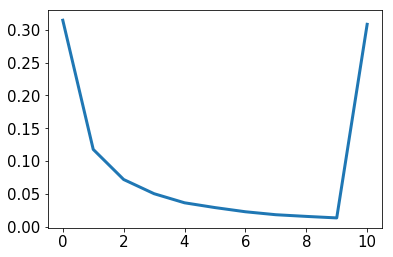

In [471]:
plt.plot(df2.loc[0])

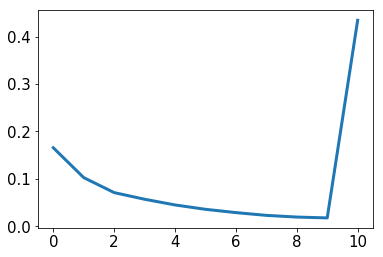

In [472]:
plt.plot(df2.loc[1])

In [394]:
for i1 in range(0, 10):
    for d2 in list(range(0, )) + [10]:
        for d3 in range(min(10-i1-d2, 10), 11):
            for d4 in range(0, 11):
                df =((df_snapshot['ci1'] == i1) & 
                    (df_snapshot['cd2'] == d2) & 
                    (df_snapshot['cd3'] == d3) & 
                    (df_snapshot['cd4'] == d4))
                print(df.sum())

59836
9456
3730
1887
950
577
400
295
121
8
990
9448
3412
1650
924
544
356
265
117
5
0
841
3688
1723
943
573
392
253
98
4
0
0
832
1762
875
585
420
283
100
14
0
0
0
846
951
630
393
276
126
12
0
0
0
0
848
601
365
254
108
7
0
0
0
0
0
846
381
255
101
9
0
0
0
0
0
0
811
247
94
6
0
0
0
0
0
0
0
873
108
7
0
0
0
0
0
0
0
0
658
8
0
0
0
0
0
0
0
0
0
144
0
0
0
0
0
0
0
0
0
0
6645
10281
3348
1692
973
628
341
221
118
7
0
899
3395
1652
921
518
396
232
111
9
0
0
795
1675
859
534
350
235
92
11
0
0
0
751
935
560
335
240
94
7
0
0
0
0
787
523
373
230
94
8
0
0
0
0
0
781
383
220
99
7
0
0
0
0
0
0
769
236
88
15
0
0
0
0
0
0
0
828
99
5
0
0
0
0
0
0
0
0
631
6
0
0
0
0
0
0
0
0
0
132
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
5950
3578
1688
942
566
363
236
88
12
0
0
761
1602
877
557
345
261
90
6
0
0
0
797
963


KeyboardInterrupt: 

In [389]:
df_snapshot.cd2.drop_duplicates()

2039914     0
2039918     1
2039935     4
2039955     3
2039957     2
2039959    10
2040001     6
2040006     5
2040034     7
2040358     8
2041418     9
Name: cd2, dtype: int64

In [326]:
df_snapshot['class'].drop_duplicates()

2039914    0
2039916    7
2039919    1
2039925    2
2039959    5
2039987    3
2040032    6
2040132    4
2040180    9
2040335    8
Name: class, dtype: int64

In [330]:
res = []
for i, (idx, grp) in enumerate(df_snapshot.groupby('class')):
    res.append(len(grp[grp.i0 == 10000000])/len(grp))

(0, 1)

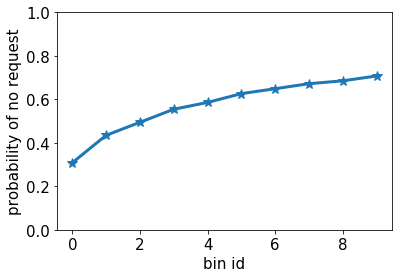

In [339]:
plt.plot(res, '*-', markersize=10)
plt.xlabel('bin id')
plt.ylabel('probability of no request')
plt.ylim([0, 1])

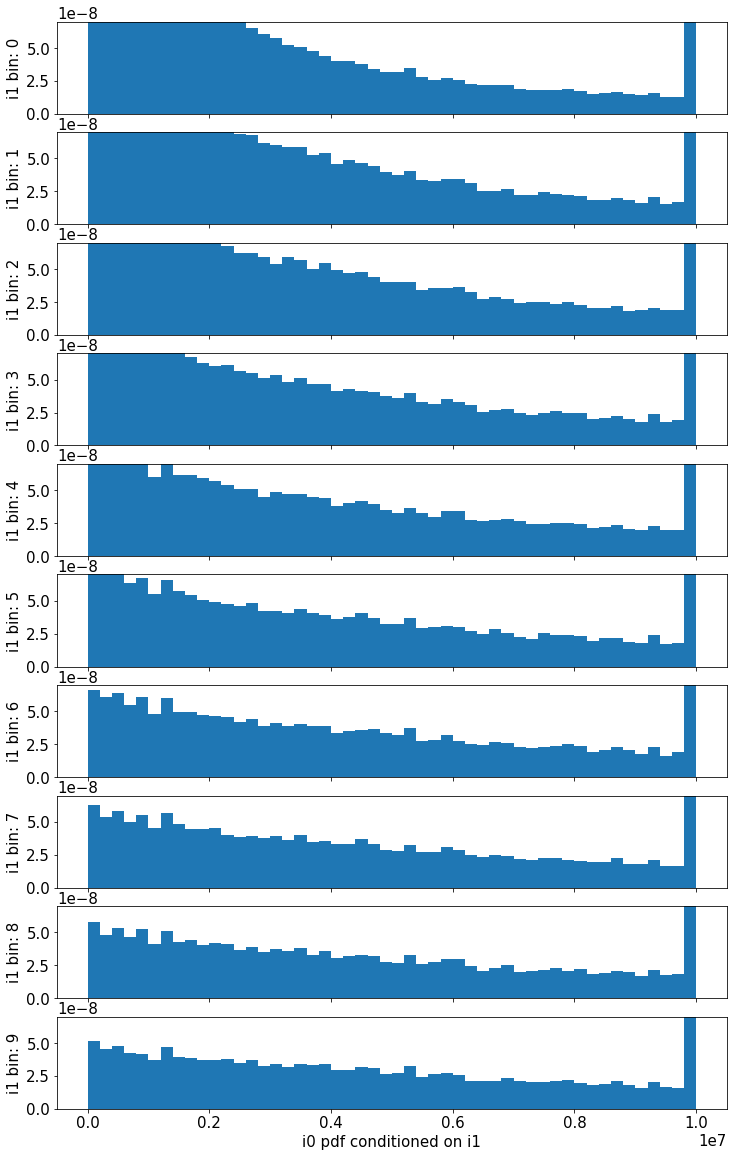

In [202]:
fig, axes = plt.subplots(sharex=True, sharey=True, nrows=len(df_snapshot['class'].drop_duplicates()),
                         figsize=(12, 2*len(df_snapshot['class'].drop_duplicates())))
for i, (idx, grp) in enumerate(df_snapshot.groupby('class')):
    axes[i].hist(grp.i0, density=True, bins=50)
    axes[i].set_ylabel(f'i1 bin: {idx}')
plt.xlabel('i0 pdf conditioned on i1')
plt.ylim([0, 0.00000007])
plt.show()

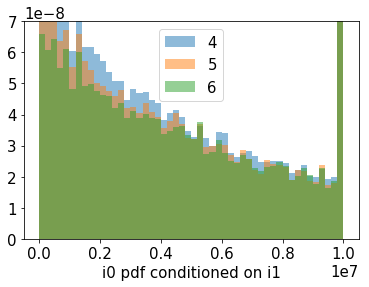

In [213]:
fig, ax = plt.subplots()
for i, (idx, grp) in enumerate(df_snapshot.groupby('class')):
    if i < 4:
        continue
    ax.hist(grp.i0, density=True, bins=50, alpha=0.5, label=idx)
    if i == 6:
        break
#     ax.set_ylabel(f'i1 bin: {idx}')
plt.xlabel('i0 pdf conditioned on i1')
plt.ylim([0, 0.00000007])
plt.legend()
plt.show()

In [222]:
df_snapshot = df_global[df_global.type==2].copy()

In [223]:
df_snapshot.head()

,type,i1,i2,i3,i4,i0
2039914,2,22,63,1246,1414,294
2039915,2,153,346,416,636,139
2039916,2,7755310,8355482,8752174,10000000,5313077
2039917,2,212455,999359,4912332,7808394,2126387
2039918,2,30749,1685599,3003372,6076566,102242


In [290]:
df_snapshot.loc[:, 'class1'] = df_snapshot.i1//1000000
df_snapshot.loc[:, 'class2'] = df_snapshot.i2//1000000
df_snapshot.loc[:, 'class3'] = df_snapshot.i3//1000000
df_snapshot.loc[:, 'class4'] = df_snapshot.i4//1000000

In [291]:
import random

In [320]:
c1 = [random.randint(0, 5), random.randint(0, 5)]
c2 = [random.randint(c1[0], 10), random.randint(c1[1], 10)]
c3 = [random.randint(c2[0], 10), random.randint(c2[1], 10)]
c4 = [random.randint(c3[0], 10), random.randint(c3[1], 10)]

In [287]:
c1 = [0, 2]
c2 = [9, 5]

In [288]:
c2

[9, 5]

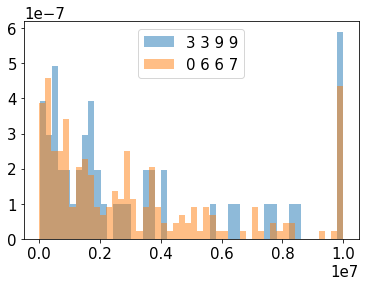

In [321]:
fig, ax = plt.subplots()
for i in range(2):
    ax.hist(df_snapshot[(df_snapshot.class1 == c1[i]) &
                        (df_snapshot.class2 == c2[i]) &
                        (df_snapshot.class3 == c3[i]) &
                        (df_snapshot.class4 == c4[i])].i0, 
            density=True, bins=50, alpha=0.5, label=f'{c1[i]} {c2[i]} {c3[i]} {c4[i]}')
#     ax.set_ylabel(f'i1 bin: {idx}')
# plt.xlabel('i0 pdf conditioned on i1')
# plt.ylim([0, 0.00000007])
plt.legend()
plt.show()

In [220]:
df_snapshot['class3'].drop_duplicates()

2039914     0
2039916     8
2039917     4
2039918     3
2039919     2
2039925     6
2039928     1
2039933     9
2039934     7
2039959    10
2039963     5
Name: class3, dtype: int64

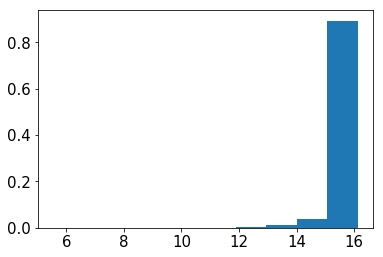

In [153]:
plt.hist(np.log1p(df_snapshot.i4), density=1)
plt.show()

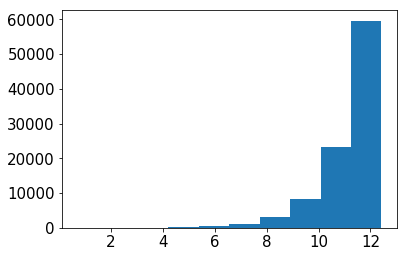

In [144]:
plt.hist(np.log1p(df_belady.i0))
plt.show()

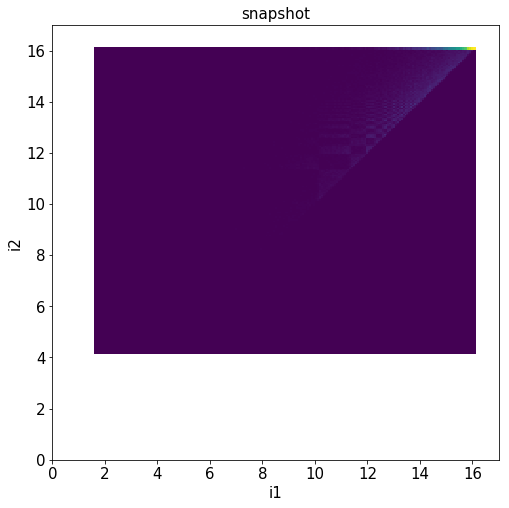

In [138]:
fig, ax = plt.subplots(figsize=(8,8))
plt.hist2d(np.log1p(df_belady['i1'].values), np.log1p(df_belady['i2'].values), label='belady', bins=[200, 200])
plt.xlim([0, 17])
plt.ylim([0, 17])
plt.xlabel('i1')
plt.ylabel('i2')
plt.title('snapshot')
plt.show()

In [ ]:
np.argsort(df_global.i0.values)

In [12]:
df_global.type.drop_duplicates()

0          1
2039914    2
4029362    3
6097721    4
Name: type, dtype: int64

In [13]:
df_global3 = df_global[df_global.type==3]
df_global = df_global[df_global.type==2]

In [16]:
intervals = df_global[['i1', 'i2', 'i3', 'i4']].values
max_interval = int(1e7)
lruk_score = max_interval*(intervals[:, 3] == max_interval) + intervals[:, 0]*(intervals[:, 3] == max_interval)+ \
    intervals[:, 3]*(intervals[:, 3] != max_interval)
lfu_score = intervals[:, 0] + max_interval*(intervals[:, 1] == max_interval) + max_interval*(intervals[:, 2] == max_interval) + \
    max_interval*(intervals[:, 3] == max_interval)

belady1p_score = (intervals[:, 0] + max_interval)*(intervals[:, 1] == max_interval) + df_global.i0.values * (intervals[:, 1] != max_interval)
belady2p_score = (intervals[:, 0] + max_interval)*(intervals[:, 2] == max_interval) + df_global.i0.values * (intervals[:, 2] != max_interval)
belady3p_score = (intervals[:, 0] + max_interval)*(intervals[:, 3] == max_interval) + df_global.i0.values * (intervals[:, 3] != max_interval)

In [50]:
np.sum(belady3p_score > max_interval)

1672065

In [52]:
_3pi0 = (df_global[intervals[:, 3] != max_interval].i0)

In [53]:
np.sum(_3pi0 == max_interval)

13425

In [54]:
np.sum(_3pi0 != max_interval)

303958

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(np.log1p(df_global3[['i1', 'i2', 'i3', 'i4']].values), np.log1p(df_global3.i0.values))
# reg.score(np.log1p(intervals), np.log1p(df_global.i0.values))
# reg.coef_
# reg.intercept_ 
lr_score = reg.predict(np.log1p(intervals))

In [18]:
belady_rank = np.argsort(df_global.i0.values)
related_set = set(belady_rank[:96000])

lru_rank = np.argsort(df_global.i1.values, kind='mergesort')
lruk_rank = np.argsort(lruk_score, kind='mergesort')
lfu_rank = np.argsort(lfu_score, kind='mergesort')
lr_rank = np.argsort(lr_score, kind='mergesort')
belady1p_rank = np.argsort(belady1p_score, kind='mergesort')
belady2p_rank = np.argsort(belady2p_score, kind='mergesort')
belady3p_rank = np.argsort(belady3p_score, kind='mergesort')

In [19]:
# sample_ids = np.linspace(0, len(intervals), 50, dtype=int)
# sample_ids = np.logspace(1, np.log10(len(intervals)), 100, dtype=int)
sample_ids = np.append(np.linspace(0, 96000, 50, dtype=int, endpoint=False), np.linspace(96000, len(intervals), 50, dtype=int))

In [24]:
lru_metric = []
lruk_metric = []
lfu_metric = []
lr_metric = []
belady1p_metric = []
belady2p_metric = []
belady3p_metric = []
belady_metric = []

for i in sample_ids:
    lru_metric.append(len(set(lru_rank[:i]).intersection(related_set)))
    lruk_metric.append(len(set(lruk_rank[:i]).intersection(related_set)))
    lfu_metric.append(len(set(lfu_rank[:i]).intersection(related_set)))
    lr_metric.append(len(set(lr_rank[:i]).intersection(related_set)))
    belady1p_metric.append(len(set(belady1p_rank[:i]).intersection(related_set)))
    belady2p_metric.append(len(set(belady2p_rank[:i]).intersection(related_set)))
    belady3p_metric.append(len(set(belady3p_rank[:i]).intersection(related_set)))
    belady_metric.append(len(set(belady_rank[:i]).intersection(related_set)))

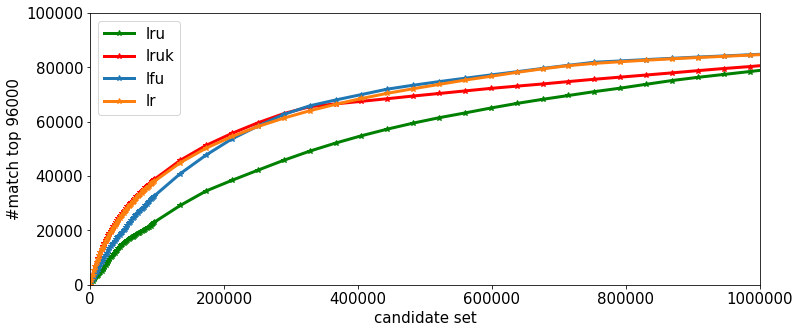

In [70]:
plt.subplots(figsize=(12, 5))
# plt.plot(sample_ids, belady_metric, label='belady')
plt.plot(sample_ids, lru_metric, label='lru', c='g', marker='*', markersize=6)
plt.plot(sample_ids, lruk_metric, label='lruk', c='r', marker='*', markersize=6)
plt.plot(sample_ids, lfu_metric, label='lfu', marker='*', markersize=6)
plt.plot(sample_ids, lr_metric, label='lr', marker='*', markersize=6)
# plt.plot(sample_ids, belady1p_metric, label='belady1p')
# plt.plot(sample_ids, belady2p_metric, label='belady2p')
# plt.plot(sample_ids, belady3p_metric, label='belady3p')
plt.legend()
plt.xlim([0, 1000000])
plt.ylim([0, 100000])
plt.xlabel("candidate set")
plt.ylabel("#match top 96000")
plt.show()

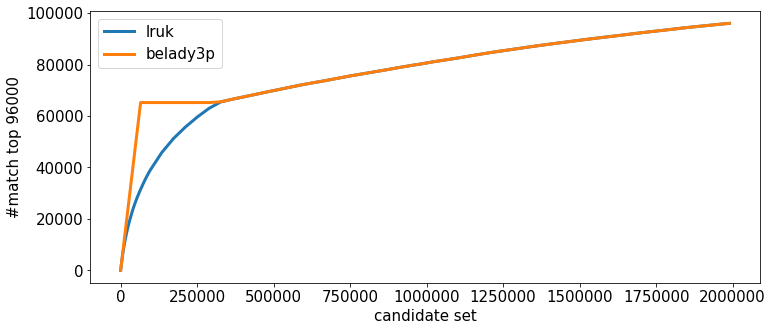

In [71]:
plt.subplots(figsize=(12, 5))
# plt.plot(sample_ids, belady_metric, label='belady')
# plt.plot(sample_ids, lru_metric, label='lru')
plt.plot(sample_ids, lruk_metric, label='lruk')
# plt.plot(sample_ids, lfu_metric, label='lfu')
# plt.plot(sample_ids, lr_metric, label='lr')
# plt.plot(sample_ids, belady1p_metric, label='belady1p')
# plt.plot(sample_ids, belady2p_metric, label='belady2p')
plt.plot(sample_ids, belady3p_metric, label='belady3p')
plt.legend()
# plt.xlim([0, 100000])
# plt.ylim([0, 100000])
plt.xlabel("candidate set")
plt.ylabel("#match top 96000")
plt.show()

In [ ]:
a = 1